In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fcc-forum-pageviews.csv


For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

## Import data



In [2]:
df = pd.read_csv('/kaggle/input/fcc-forum-pageviews.csv', parse_dates = ["date"], index_col = "date")

## Clean data

In [3]:
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]

# Draw line plot

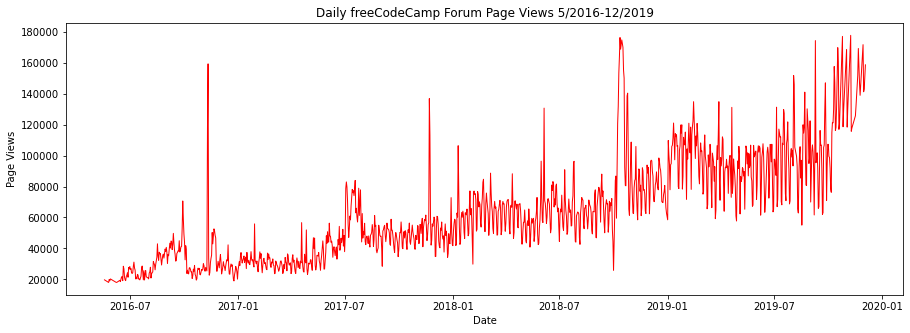

In [4]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(df.index, df['value'], color='red', linewidth=1)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

plt.show()

# Bar Plot

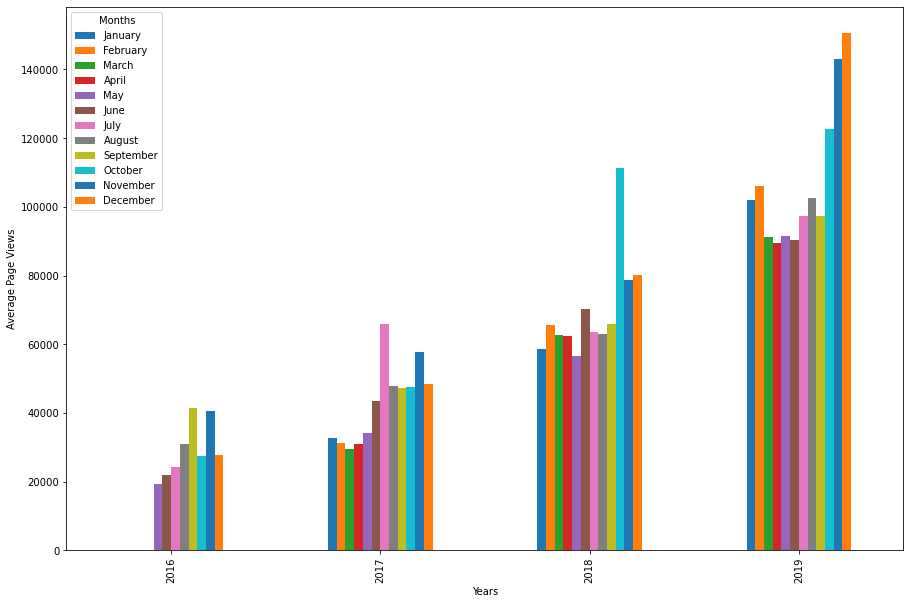

In [5]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df["month"] = df.index.month
df["year"] = df.index.year
df_bar = df.groupby(["year", "month"])["value"].mean()
df_bar = df_bar.unstack()

# Draw bar plot
fig = df_bar.plot(kind ="bar", legend = True, figsize = (15,10)).figure
plt.xlabel("Years", fontsize= 10)
plt.ylabel("Average Page Views", fontsize= 10)
#plt.xticks(rotation=30)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10, title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.show()

# Box plot

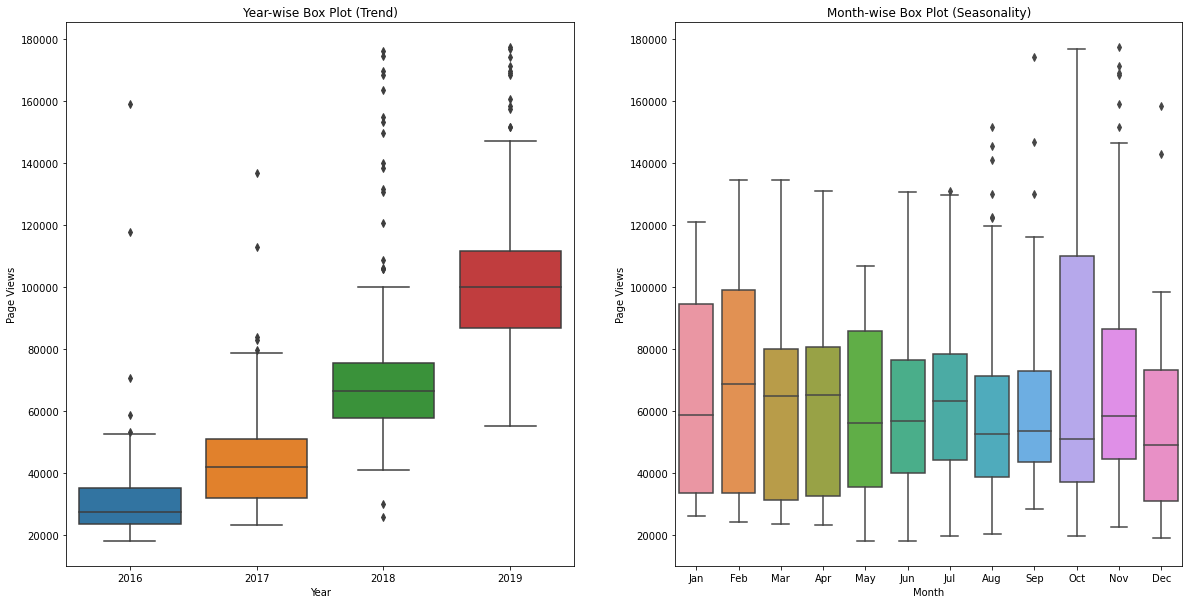

In [6]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")

# Draw box plots (using Seaborn)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)

ax1 = sns.boxplot(x=df_box["year"], y=df_box["value"], ax=ax1)
ax1.set_title("Year-wise Box Plot (Trend)") 
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

ax2 = sns.boxplot(x=df_box["month"], y=df_box["value"], ax=ax2)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')

plt.show()